# Exploratory Data Analysis and Feature Engineering

This notebook demostrates the methods and visualizations presented in the EDA and Feature Engineering module.

In [6]:
import pandas as pd
from google.colab import drive # Used for mounting Google Drive
import os

We will load a CSV file from Google Drive. The specific file that we load will be the `train.csv` file from the [Kaggle House Prices dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

In [8]:
# Mount Google Drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [9]:
os.chdir('/content/drive/MyDrive/Colab Notebooks')
df = pd.read_csv("housing_prices_train.csv")

By default, Pandas only display a limited number of columns when we print a dataframe. The dataset that we are working with contains a large number of columns. We will change the `max_columns` setting so that Pandas displays all columns.  

In [ ]:
# We change this setting so that we can see all columns
pd.set_option('display.max_columns', None)

---
### 1. Initial Data Exploration

In this section we will perform the steps listed on the "Initial data exploration" slide.

The `.head()` method will display the first five rows of a dataframe. We can use this to get a quick view of the columns contained in our table and a few sample values from each column.

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will use `.shape` to see the total count of rows and columns in our dataframe. In this case, the table contains 1,460 rows and 81 columns.

In [ ]:
df.shape

(1460, 81)

This dataset comes with a text file that provides a description of the meaning of each column. It is worth reviewing this to understand what all the fields provided to us mean.

The `.info()` method of a dataframe provides a useful summary of the columns in the dataframe, the data types of the values stored in each column, and the number of non-null values present in each column. The data types are useful because they indicate which columns contain numerical values and which columns contain string values. The columns with `int64` and `float64` data types contain numerical values, and the columns with `object` data types usually contain strings.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The `.describe()` method of a dataframe provides summary statistics for all of the numerical columns in the dataframe. Specifically, we are provided with:
- `count`: The total number of non-null values in the column.
- `mean`: The mean of the non-null values in the column.
- `std`: The standard deviation of the non-null values in the column.
- `min`: The lowest value present in the column.
- `25%`: The 25th percentile of values in the column.
- `50%`: The median of values in the column.
- `75%`: The 75th percentile of values in the column.
- `max`: The greatest value present in the column.

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can also get a summary of the non-null values in the columns that contain string values. The `value_counts()` method can be applied to individual columns. This provides all of the unique values present in the column (excluding nulls), together with the number of times each of these values occurs.

In [ ]:
df["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [ ]:
df["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

---

### 2. Exploratory Data Analysis

Here we will implement the visualizations shown in the EDA section. Specifically we will implement:
- Correlation heatmap with target.
- Correlation heatmap for a collection of features.
- Distribution plot for a categorical variable
- Scatter plot with regression line
- B[link text](https://)oxplot

Seaborn and Matplotlib are two commonly used Python visualization libraries. We will use both to generate the visualizations described in the slides.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

We will start off by analyzing correlations between the `SalePrice` target and the various numerical features. To get the columns containing numerical values, we will just retrieve the columns of `df.describe()`. Recall that `.describe()` provides summary statistics for the numerical columns, so the columns returned should be the complete set of numerical columns in the dataframe.

In [ ]:
numerical_cols = df.describe().columns

The `.corr()` method of a dataframe will provide the Pearson correlation coefficients between every pair of columns in the provided dataframe. For small dataframes with few columns this is relatively easy to inspect. For larger tables, a visualization usually provides a clearer presentation of this information.

In [ ]:
df[numerical_cols].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

We will provide a visualization of the correlations between the values in each numerical column and the target `SalePrice`. We will use the `heatmap` in Seaborn to generate this visualization. A few notes on how we generate this:
- We will sort the correlations in the "SalePrice" column in descending order.
- We use `annot=True` to show the actual correlation values on the heatmap.

This plot alone gives us some quick insights into which numerical columns might be most predictive of `SalePrice` if we were to include them as features in a model.

<Axes: >

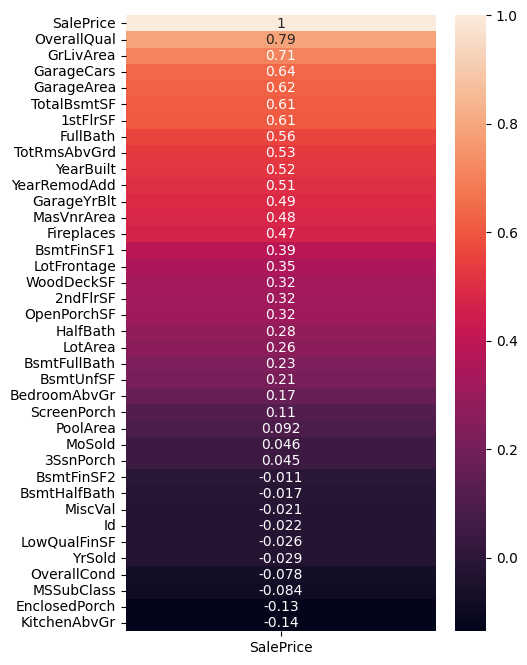

In [ ]:
plt.figure(figsize=(5,8))
sns.heatmap(
    df[numerical_cols].corr().sort_values("SalePrice", ascending=False)[["SalePrice"]],
    annot=True)

We can also visualize the correlations between numerical values in the table. This is useful, since we generally don't want to include many features that are strongly correlated with one another in our model. The first heatmap below shows correlations between the first 10 features.

If we have many features, the plots can become cluttered if we include the correlation values on each grid cell. In the second plot, we show the full correlation heatmap for all numerical columns with `annot=False` to make the plot more readable.

<Axes: >

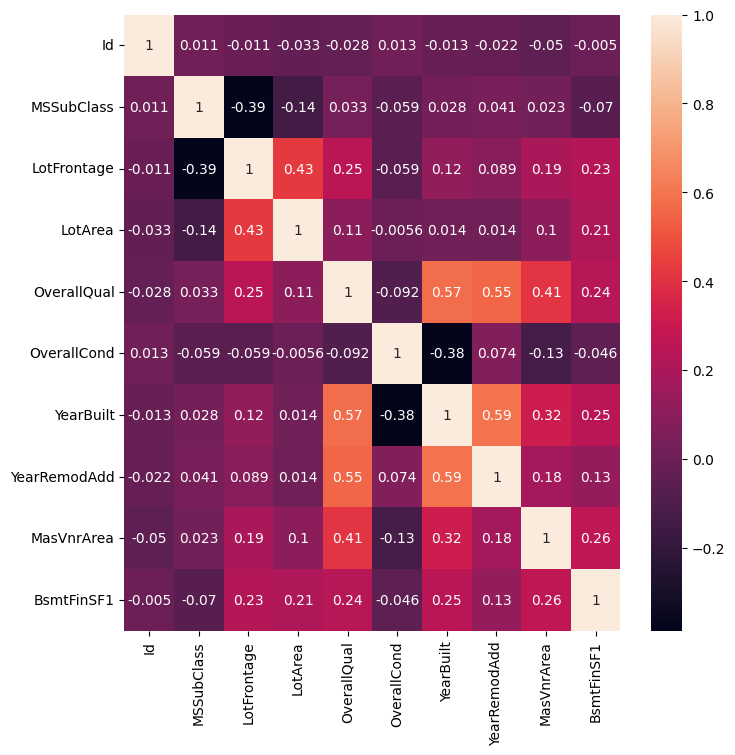

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(
    df[numerical_cols].corr().iloc[:10,:10],
    annot=True)

<Axes: >

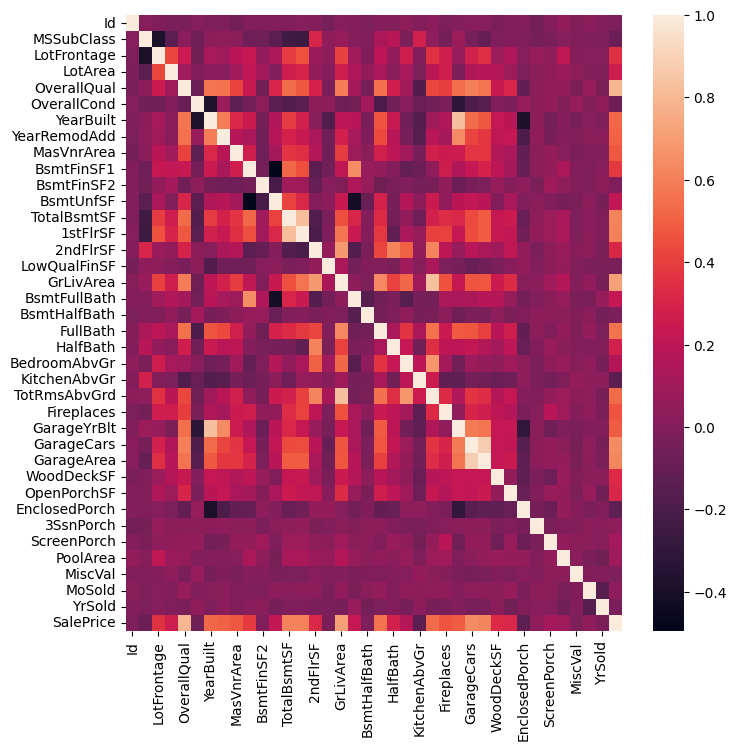

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=False)

Distribution plots provide a useful summary of categorical features. Here we show a distribution plot for `KitchQual` (Kitchen Quality). We can immediately see a few things from this plot:
- The majority of houses have a kitchen quality that is "TA" (average) or "Gd" (good). Relatively few have a kitchen quality that is "Fa" (Fair) or "Ex" (Excellent).
- We can see the relationship between `KitchenQual` and `SalePrice`. For each value of `KitchenQual`, we see the mean `SalePrice` increasing in order of "Fa", "TA", "Gd", "Ex". This is intuitively reasonable.

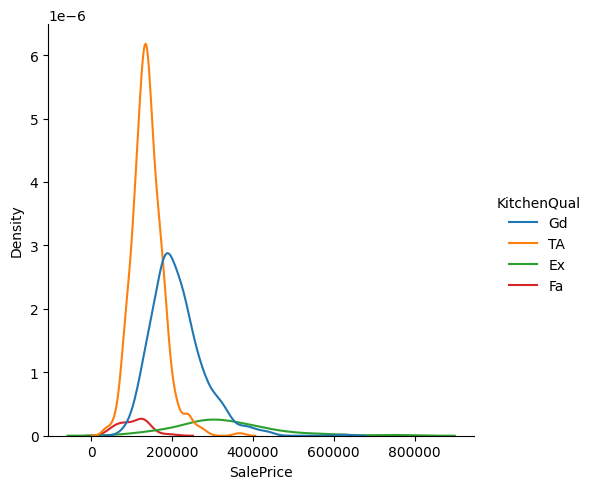

In [ ]:
sns.displot(data=df, x="SalePrice", hue="KitchenQual", kind="kde")

The Seaborn `regplot` provides a useful visualization that combines a scatter plot and regression line. The grey area around the regression line indicates the 95% confidence interval around this line. Intuitively, we can interpret this as the region we would expect to see the regression line in 95% of the time if we repeatedly resampled new data sets of the same size from this same source. When the CI is narrow, that indicates a stable relationship between the feature and the target. When the CI is wide, this indicates that the relationship between the feature and the target might be highly sensitive to a few outliers in the dataset.  

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

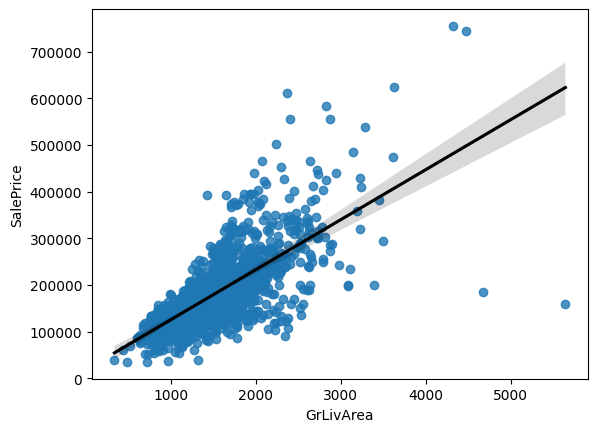

In [ ]:
sns.regplot(df, x="GrLivArea", y="SalePrice", line_kws=dict(color="k"))

You will often encounter box plots in data visualizations. This box plot shows:
- The interquartile range (IQR): Blue area indicating the 25th to 75th percentile.
- The median: Line in the middle of the IQR.
- The “minimum” and “maximum”: Horizontal lines indicating 1.5*IQR above and below the IQR.
- Outliers: Individual points outside the “minimum” and “maximum”

<Axes: ylabel='GrLivArea'>

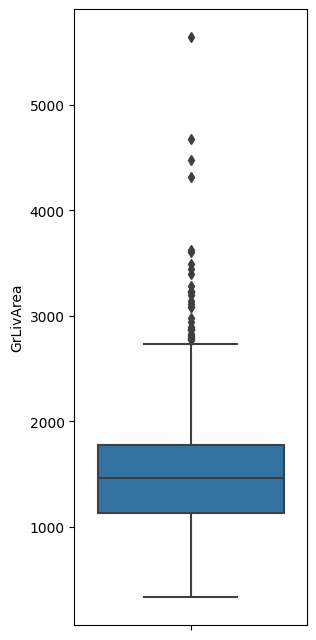

In [ ]:
plt.figure(figsize=(3,8))
sns.boxplot(df, y="GrLivArea")

---

### 3. Feature Preprocessing

Here we will show ho the following can be applied to a Pandas dataframe:
- One-hot encoding
- Ordinal encoding
- Logarithmic transform
- Quantile transform
- Standard and MinMax scalers
- Creating polynomial features
- Imputing null values
- Principal components analysis

We will use Numpy to compute logarithmsm, and Scikit-learn for scalers, quantile transformers, and principal components analysis. Scikit-learn is a very widely use machine learning library that you will see much more of in later modules.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

The Pandas `get_dummies` function can be applied to a single column of a dataframe to produce a new dataframe containing columns for all of the one-hot encoded values.

In [ ]:
pd.get_dummies(df["Neighborhood"])

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Often we want to concatenate the one-hot encoded columns onto our original dataframe or a new dataframe containing all of the features that we are building. The code below shows how we can use the pandas `concat` function to concatenate the new features onto an existing dataframe.

We wont modify our dataframe `df` here, but if we wanted to update this `df` we could set it equal to the dataframe computed below.

In [ ]:
pd.concat(
    [
        pd.get_dummies(df["Neighborhood"], prefix="Neighborhood"),
        df
    ],
    axis=1
)

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,T

Here we will compute an ordinal encoding of `KitchenQual`. One way to do this is to define a dictionary containing the desired numerical value for each categorical value, then use `apply` to generate a new column containing these values.

We wont update our dataframe `df` here, but if we wanted to add this column to our dataframe we could assign these values to a new column called, for example, `KitchenQualOrdinal`.

In [ ]:
ordinal_mapping = {
    "Po":	0,
    "Fa":	1,
    "TA": 2,
    "Gd": 3,
    "Ex": 4,
}

df.apply(lambda x: ordinal_mapping[x["KitchenQual"]], axis=1)

0       3
1       2
2       3
3       3
4       3
       ..
1455    2
1456    2
1457    3
1458    3
1459    2
Length: 1460, dtype: int64

To compute the logarithic transform, we can just apply the Numpy function `log` to the entire column that we want to transform. These values could then be assigned to a new column in our dataframe.

In [ ]:
np.log(df["LotArea"])

0       9.041922
1       9.169518
2       9.328123
3       9.164296
4       9.565214
          ...   
1455    8.976768
1456    9.486076
1457    9.109636
1458    9.181632
1459    9.204020
Name: LotArea, Length: 1460, dtype: float64

To compute the quantile transform, we will create a new `QuantileTransformer` object. This transform is built and applied in two steps. First the distribution of the values needs to be fit to determine the transformation, then the transform can be applied to the values. The method `fit_transform` performs both of these steps in one pass.

It is worth noting that when we build a model, typically we fit this transform on the training data. The transform fit on the training data is then applied to both the training and test data. In this case, we can first use the `fit_transform` method on the training data, then just use the `transform` method on the test data to transform the data without refitting the transformation.

In [ ]:
q = QuantileTransformer()
q.fit_transform(df[["LotArea"]])

array([[0.34934935],
       [0.52502503],
       [0.72022022],
       ...,
       [0.44144144],
       [0.53823968],
       [0.56656657]])

The `StandardScaler` and `MinMaxScaler` are applied in a very similar manner to the `QuantileTransformer`. As with the quantile transformer, these scaling transformations are usually fit on the training data then applied to both the training data and test data (without refitting on the test data).

In [ ]:
s = StandardScaler()
s.fit_transform(df[["LotArea"]])

array([[-0.20714171],
       [-0.09188637],
       [ 0.07347998],
       ...,
       [-0.14781027],
       [-0.08016039],
       [-0.05811155]])

In [ ]:
m = MinMaxScaler()
m.fit_transform(df[["LotArea"]])

array([[0.0334198 ],
       [0.03879502],
       [0.04650728],
       ...,
       [0.03618687],
       [0.03934189],
       [0.04037019]])

To generate new polynomial features, we can simply create new columns that are powers of the existing columns. For example, below we compute the square of the values in `OverallQual`. The same approach can be followed if we want to create new columns that are products of different columns.

In [ ]:
df["OverallQual"]**2

0       49
1       36
2       49
3       49
4       64
        ..
1455    36
1456    36
1457    49
1458    25
1459    25
Name: OverallQual, Length: 1460, dtype: int64

The `fillna` method of a dataframe can be used to fill in null values within a dataframe. This method can be appied in various ways. For example, we can fill all nulls in the entire dataframe with a single value or fill nulls in different columns with different values. The example below shows how we can fill nulls in different columns with different values.

In [ ]:
df.fillna({"PoolQC": "NA", "LotFrontage": 0})

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NA,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NA,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,F


When performing mean or mode imputation, we would compute these statistics for the corresponding columns on the non-null values, construct a dictionary containing these values, then apply to the dataframe with `fillna`. The two cells below illustrate these steps.

In [ ]:
mean_values = df[numerical_cols].mean().to_dict()
mean_values

{'Id': 730.5,
 'MSSubClass': 56.897260273972606,
 'LotFrontage': 70.04995836802665,
 'LotArea': 10516.828082191782,
 'OverallQual': 6.0993150684931505,
 'OverallCond': 5.575342465753424,
 'YearBuilt': 1971.267808219178,
 'YearRemodAdd': 1984.8657534246574,
 'MasVnrArea': 103.68526170798899,
 'BsmtFinSF1': 443.6397260273973,
 'BsmtFinSF2': 46.54931506849315,
 'BsmtUnfSF': 567.2404109589041,
 'TotalBsmtSF': 1057.4294520547944,
 '1stFlrSF': 1162.626712328767,
 '2ndFlrSF': 346.99246575342465,
 'LowQualFinSF': 5.844520547945206,
 'GrLivArea': 1515.463698630137,
 'BsmtFullBath': 0.42534246575342466,
 'BsmtHalfBath': 0.057534246575342465,
 'FullBath': 1.5650684931506849,
 'HalfBath': 0.38287671232876713,
 'BedroomAbvGr': 2.8664383561643834,
 'KitchenAbvGr': 1.0465753424657533,
 'TotRmsAbvGrd': 6.517808219178082,
 'Fireplaces': 0.613013698630137,
 'GarageYrBlt': 1978.5061638868744,
 'GarageCars': 1.7671232876712328,
 'GarageArea': 472.9801369863014,
 'WoodDeckSF': 94.2445205479452,
 'OpenPorch

In [ ]:
# We would reassign to df or pass the argument "inplace=True" if we wanted to actually update the values in df
df.fillna(mean_values)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

Here we will show how principal components analysis could be used to produce a reduced-dimension set of features from all of our numerical features. To start, let's inspect and count the number of numerical features.

In [ ]:
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
numerical_cols.shape

(38,)

We will want to exclude the `SalePrice` from the features, since this is a transformation of the input features.

In [ ]:
numerical_cols = numerical_cols.drop("SalePrice")

If we wanted to generate a 10-dimensional approximation to our 37-dimensional numerical feature vector, we can create a `PCA` object with 10 components.

In [ ]:
pca = PCA(n_components=10, svd_solver='full')

We can then use `fit_transform` to first find the principal components, then transform the data. As with the feature scalers, we would fit the principal compnents on training data, then use these principal components to transform the training and test data.

In [ ]:
pca.fit_transform(df[numerical_cols].fillna(0))

array([[-2064.05057798,    44.3426621 ,  -269.1657816 , ...,
         -160.1819485 ,    -9.09927694,    41.97356646],
       [ -910.65220775,    13.8752703 ,   753.89349012, ...,
          -57.5950466 ,     9.1754091 ,  -141.45333005],
       [  735.62508922,   105.6598925 ,  -459.45793171, ...,
         -147.72565901,    -7.99016315,    31.02016057],
       ...,
       [-1458.87090283,   640.64806043, -1020.69999917, ...,
          -71.89334359,   128.51496002,  -248.74233373],
       [ -810.620013  ,  -590.65501704,   315.43691565, ...,
          629.21758453,   904.37248182,   340.75775015],
       [ -576.71208159,   -76.29616988,   704.41613051, ...,
          116.52758758,   308.19108021,    -4.10036608]])

Note that we applied `fillna(0)` before transforming. PCA need all null values to be imputed before fitting or transforming. Here we just arbitrarily filled nulls with zeros, but in practive you would use a more thoughtful imputation.

The result above is a Numpy array. If we wanted to create a dataframe containing the new feature columns, we could just pass this array to `pd.DataFrame` to create a dataframe.

In [ ]:
pd.DataFrame(pca.fit_transform(df[numerical_cols].fillna(0)))

,0,1,2,3,4,5,6,7,8,9
0,-2064.050578,44.342662,-269.165782,732.438329,-150.813922,-17.961317,-765.144802,-160.181948,-9.099277,41.973566
1,-910.652208,13.875270,753.893490,210.108473,-32.113186,33.938166,-731.578211,-57.595047,9.175409,-141.453330
2,735.625089,105.659892,-459.457932,410.058797,-112.334443,-42.352833,-754.221248,-147.725659,-7.990163,31.020161
3,-969.373589,-33.525645,-566.552673,184.343437,-84.571493,-109.142150,-746.763650,39.086395,-48.190263,-76.970054
4,3759.409820,644.868082,-534.984353,524.497693,-119.581134,58.357096,-749.968788,-152.763216,-67.833307,198.900354
...,...,...,...,...,...,...,...,...,...,...
1455,-2605.676932,72.434117,-647.279572,-250.379698,-36.369572,-254.403310,698.178508,-133.414508,65.876714,-83.557689
1456,2684.089843,949.636178,548.326298,-83.144247,9.864845,88.946317,753.043424,492.865275,-47.582731,-79.637422
1457,-1458.870903,640.648060,-1020.699999,535.870137,2388.081352,10.622318,754.444360,-71.893344,128.514960,-248.742334
1458,-810.620013,-590.655017,315.436916,28.071579,-72.056125,-258.231083,713.583797,629.217585,904.372482,340.757750


Before closing on the topic of PCA, we should say a few words about how the number of principal components are selected. Recall that PCA maps the input vector to a set of coordinates in which values are uncorrelated. The components that we can discard without losing much information are the ones that have low variance. So, we can first perform a full PCA on all coordinates then look at the variance of each resulting coordinate:

In [ ]:
pca = PCA(svd_solver='full')
df_pca = pd.DataFrame(pca.fit_transform(df[numerical_cols].fillna(0)))
df_pca.var()

0     9.968594e+07
1     5.157740e+05
2     3.434279e+05
3     2.817313e+05
4     2.444897e+05
5     1.996124e+05
6     1.774437e+05
7     5.055359e+04
8     3.110899e+04
9     2.601129e+04
10    1.853255e+04
11    1.402516e+04
12    4.157474e+03
13    3.374970e+03
14    3.058620e+03
15    2.796290e+03
16    1.616855e+03
17    1.521756e+03
18    9.419442e+02
19    8.453592e+02
20    5.999876e+02
21    2.043171e+02
22    7.260204e+00
23    1.686652e+00
24    9.380776e-01
25    8.642094e-01
26    6.251646e-01
27    2.868389e-01
28    2.417815e-01
29    1.771032e-01
30    1.413942e-01
31    9.896412e-02
32    7.601954e-02
33    4.622544e-02
34    2.957496e-02
35    6.888222e-25
36    8.519717e-25
dtype: float64

From the information above, we can decide where we want to set our cutoff. Note that there are extreme differences between the highest variance components and lower variance components. This is likely due to the large differences in scale between different features, where the features with the largest scale are dominating the variance of the first principal components.

To get a sense of the approprite dimension to use, we can first scale the features before applying PCA:

In [ ]:
s = StandardScaler()
df_scaled = s.fit_transform(df[numerical_cols].fillna(0))

pca = PCA(svd_solver='full')
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
variances = df_pca.var()

In [ ]:
variances

0     6.844209e+00
1     3.189969e+00
2     2.201490e+00
3     2.052133e+00
4     1.534130e+00
5     1.290192e+00
6     1.187666e+00
7     1.167917e+00
8     1.123121e+00
9     1.093802e+00
10    1.074069e+00
11    1.032583e+00
12    1.016818e+00
13    1.015110e+00
14    9.844746e-01
15    9.409180e-01
16    9.054329e-01
17    8.509415e-01
18    8.269430e-01
19    7.821753e-01
20    7.471875e-01
21    7.166314e-01
22    6.473034e-01
23    6.208679e-01
24    5.725704e-01
25    4.744560e-01
26    3.861732e-01
27    3.476491e-01
28    2.892570e-01
29    2.805736e-01
30    2.548836e-01
31    1.928961e-01
32    1.510289e-01
33    1.317622e-01
34    9.802514e-02
35    1.348088e-30
36    7.314945e-32
dtype: float64

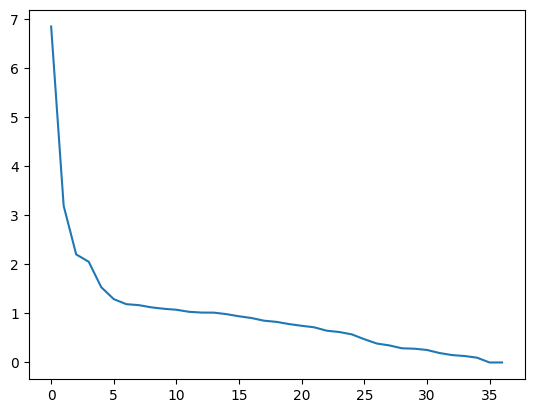

In [ ]:
plt.plot(variances)

Here we see a more reasonable range of variances from which we can set our cutoff.